In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/it-service-ticket-classification-dataset/all_tickets_processed_improved_v3.csv


# Libraries & Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
try:
     df = pd.read_csv('/kaggle/input/it-service-ticket-classification-dataset/all_tickets_processed_improved_v3.csv')
     print("Dataframe is successfully downloaded")
     print(f"Data size: {df.shape[0]} rows × {df.shape[1]} columns")
except Exception as e:
    print("Error:", e)

Dataframe is successfully downloaded
Data size: 47837 rows × 2 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47837 entries, 0 to 47836
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Document     47837 non-null  object
 1   Topic_group  47837 non-null  object
dtypes: object(2)
memory usage: 747.6+ KB


In [5]:
print(df.isnull().sum())
print(df.duplicated().sum())

Document       0
Topic_group    0
dtype: int64
0


# Data Overview

In [6]:
df.head()

,Document,Topic_group
0,connection with icon icon dear please setup ic...,Hardware
1,work experience user work experience user hi w...,Access
2,requesting for meeting requesting meeting hi p...,Hardware
3,reset passwords for external accounts re expir...,Access
4,mail verification warning hi has got attached ...,Miscellaneous


In [7]:
print(df['Topic_group'].nunique())
print(df['Topic_group'].unique())

8
['Hardware' 'Access' 'Miscellaneous' 'HR Support' 'Purchase'
 'Administrative rights' 'Storage' 'Internal Project']


Text(0.5, 0, 'Topic Group')

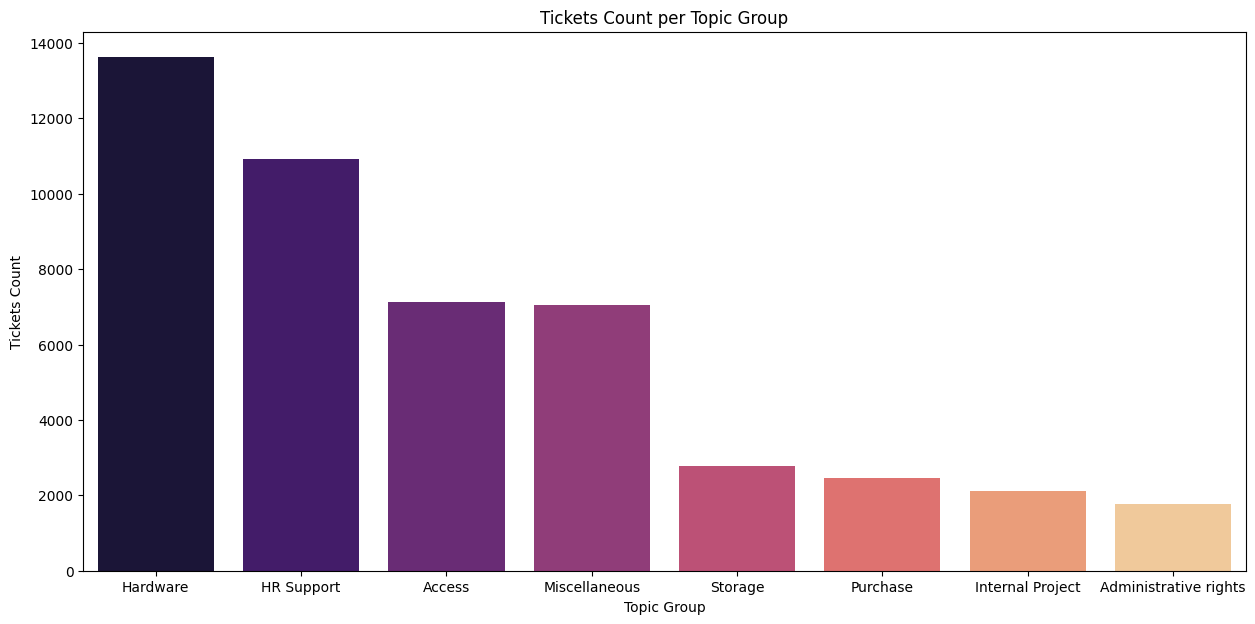

In [8]:
groups_size = df.groupby(df['Topic_group']).count()
groups_size = groups_size.sort_values(by='Document', ascending=False)
groups_size = groups_size.reset_index()
plt.subplots(figsize=(15, 7))
sns.barplot(x='Topic_group', y='Document', data=groups_size, palette='magma')
plt.title('Tickets Count per Topic Group')
plt.ylabel('Tickets Count')
plt.xlabel('Topic Group')

In [9]:
groups_size

,Topic_group,Document
0,Hardware,13617
1,HR Support,10915
2,Access,7125
3,Miscellaneous,7060
4,Storage,2777
5,Purchase,2464
6,Internal Project,2119
7,Administrative rights,1760


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


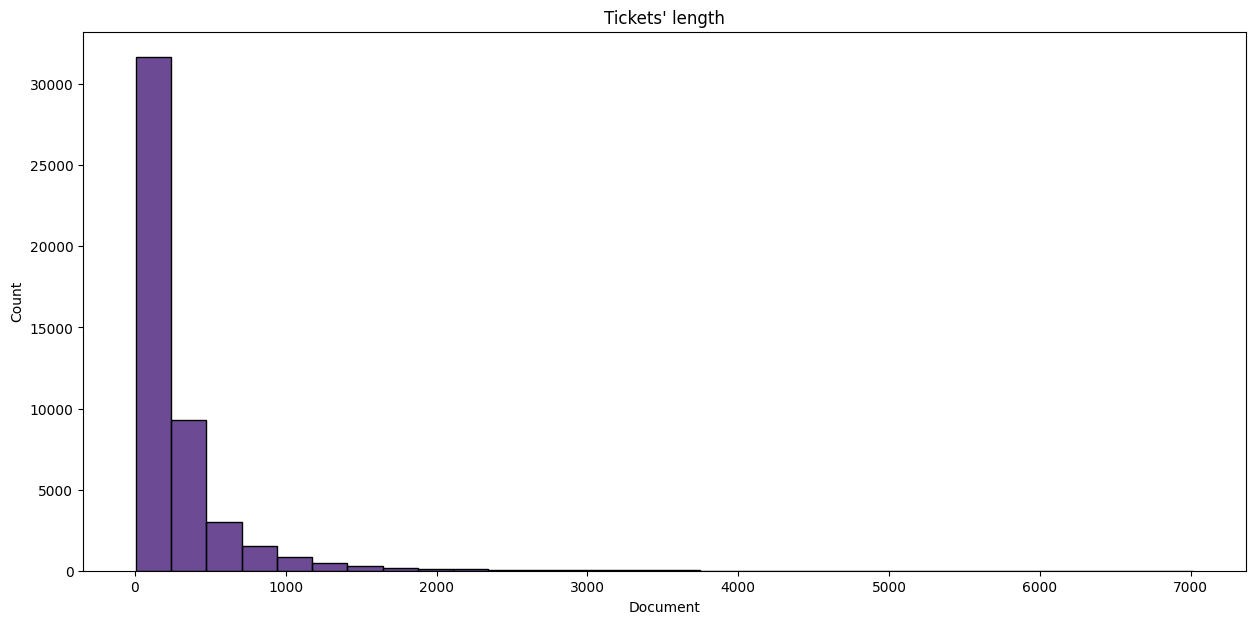

Ticket's length mean: 291.9
Ticket's length median: 175.0
The minimum ticket's length: 7
The maximum ticket's length: 7015


In [10]:
color = sns.color_palette("magma", n_colors=4)[0]
plt.subplots(figsize=(15, 7))
sns.histplot(df['Document'].astype(str).apply(len), bins=30, color=color, kde=False)
plt.title("Tickets' length")
plt.show()

print("Ticket's length mean:", df['Document'].astype(str).apply(len).mean().round(1))
print("Ticket's length median:", df['Document'].astype(str).apply(len).median())
print("The minimum ticket's length:", df['Document'].astype(str).apply(len).min())
print("The maximum ticket's length:", df['Document'].astype(str).apply(len).max())

In [11]:
df[df['Document'].astype(str).apply(len) == 7015]

,Document,Topic_group
6615,for re hi after talking mo looks link function...,Hardware


In [12]:
df[df['Document'].astype(str).apply(len) == 7]

,Document,Topic_group
4215,open si,Hardware
36619,bug bug,Miscellaneous


In [13]:
with pd.option_context('display.max_colwidth', None):
    print("Minimum:",df['Document'][df['Document'].astype(str).apply(len) == 7].astype(str))
    print()
    print()
    print("Maximum:",df['Document'][df['Document'].astype(str).apply(len) == 7015].astype(str))

Minimum: 4215     open si
36619    bug bug
Name: Document, dtype: object


Maximum: 6615    for re hi after talking mo looks link function best positioned make change please add routes existing interconnect via added routes which carried across then over connect believe needs done add route also route also add dynamic routing main please hesitate come back thanks infrastructure architect ext october re thanks mo mo please liaise going forward regards infrastructure programme upcoming leave st december october re good morning gents mo taking today looks added route which mean add routing well mo cr change mo please update after taken thanks infrastructure architect ext october re hi looking once routing has setup tested successfully please configuration resolved test prior regards infrastructure programme upcoming leave st december october re hi done work unable connect saying cannot traffic copy thread anybody also include based test seems resolve suspicion routing attached hit routing

In [14]:
for group in df['Topic_group'].unique():
    sample = df[df['Topic_group'] == group]['Document'].iloc[0]
    print(f"\n[{group}] ticket example:\n{sample[:500]}...")


[Hardware] ticket example:
connection with icon icon dear please setup icon per icon engineers please let other details needed thanks lead...

[Access] ticket example:
work experience user work experience user hi work experience student coming next his name much appreciate him duration thank...

[Miscellaneous] ticket example:
mail verification warning hi has got attached please addresses best regards monitoring analyst verification warning...

[HR Support] ticket example:
access request dear modules report report cost thank much regards...

[Purchase] ticket example:
system hello movement has left available device please kind device denmark copenhagen denmark please source quotation shipping by lead...

[Administrative rights] ticket example:
notification wireless devices upgrade cr medium wireless devices upgrade cr medium hi please announce users about window wireless best regards senior engineer cr medium has by hello summary software upgrade release has approved by please wait un